# Código de preparación de datos para flujos de muones atmosféricos...

Este pequeño código prepara los datos para ser manipulados. Los datos provienen de la salida de muones despues del resultado de una simulación en Corsika para varias latitudes y modelos de atmósferas. La idea es manipular el primero de los archivos para obtener la energía total a partir de la consideración de los momentos en las direcciones $x$, $y$, y $z$. Lo segundo es teniendo la energía vamos a organizar los datos de tal manera de calcular el flujo diferencial, es decir, sumar todos los muones que llegan en la misma dirección para tener el número de muones que entran por esa determinada dirección, con esto tendremos una data de flujo por dirección.

In [1]:
import numpy as np
import math
import pandas as pd
from scipy.stats import itemfreq
import matplotlib.pyplot as plt
#ff_int=lambda x: "%i" % x
#ff_dec=lambda x: "%.1f" % x
#np.set_printoptions(formatter={'float_kind':ff_int})
omega=2*np.pi #Solid angle of a Hemisphere
factor=3600*1E4*omega #For convert m^-2*hour to cm^-2*s*sr^-1 divide for factor...!

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in divide


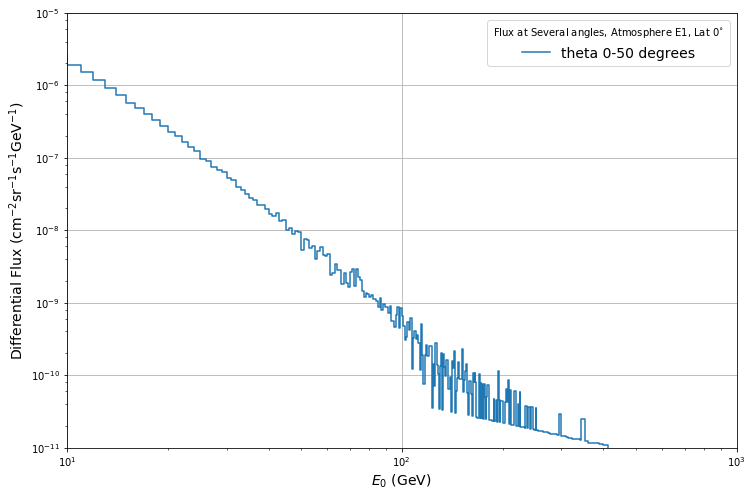

In [5]:
data_0_E1=np.loadtxt('muon_lat0_atmE1.out',delimiter=' ',usecols=range(3))
px_0_E1,py_0_E1,pz_0_E1=data_0_E1[:,0],data_0_E1[:,1],data_0_E1[:,2]
p_0_E1=np.sqrt(px_0_E1**2+py_0_E1**2+pz_0_E1**2)
m_rest=0.1057 #unit: GeV/c**2 #masa en reposo del muon
E_0_E1=np.round(np.sqrt(p_0_E1**2+m_rest**2)) # Energía a partir de la masa en reposo del muon
theta_0_E1=np.round(np.degrees(np.arccos(pz_0_E1/p_0_E1)),decimals=0) # Calcula en angulo cenith
at2_0_E1=np.arctan2(py_0_E1,px_0_E1)
phi_0_E1=np.round(np.degrees((2*np.pi+at2_0_E1)*(at2_0_E1<0)+(at2_0_E1)*(at2_0_E1>0)),decimals=0) # Calcula el angulo azimuth
data_0_E1=np.c_[theta_0_E1,phi_0_E1,E_0_E1]
data_0_E1=data_0_E1[data_0_E1[:,0].argsort()]
#print E_0_E1, theta_0_E1, phi_0_E1
#print data_0_E1
E1_0_E1=data_0_E1[(data_0_E1[:,0]>=.0) & (data_0_E1[:,0]<=35)][:,2]
E2_0_E1=data_0_E1[(data_0_E1[:,0]<=65) & (data_0_E1[:,0]>=50)][:,2]
E3_0_E1=data_0_E1[(data_0_E1[:,0]<=80) & (data_0_E1[:,0]>=65)][:,2]
E4_0_E1=data_0_E1[(data_0_E1[:,0]<=90) & (data_0_E1[:,0]>=80)][:,2]
F1_0_E1,F2_0_E1,F3_0_E1,F4_0_E1=np.unique(E1_0_E1),np.unique(E2_0_E1),np.unique(E3_0_E1),np.unique(E4_0_E1)
N1_0_E1,N2_0_E1,N3_0_E1,N4_0_E1=[],[],[],[]
for i in F1_0_E1:
    N1_0_E1.append(np.sum(E1_0_E1==i))
for i in F2_0_E1:
    N2_0_E1.append(np.sum(E2_0_E1==i))
for i in F3_0_E1:
    N3_0_E1.append(np.sum(E3_0_E1==i))
for i in F4_0_E1:
    N4_0_E1.append(np.sum(E4_0_E1==i))
N1_0_E1,N2_0_E1,N3_0_E1,N4_0_E1=np.array(N1_0_E1)/(factor*F1_0_E1),np.array(N2_0_E1)/(factor*F2_0_E1),np.array(N3_0_E1)/(factor*F3_0_E1),np.array(N4_0_E1)/(factor*F4_0_E1)

plt.figure(figsize=(12,8))
plt.loglog(F1_0_E1,N1_0_E1,label='theta 0-50 degrees',drawstyle='steps')
#plt.loglog(F2_0_E1,N2_0_E1,label='theta 50-65 degrees',drawstyle='steps')
#plt.loglog(F3_0_E1,N3_0_E1,label='theta 65-80 degrees',drawstyle='steps')
#plt.loglog(F4_0_E1,N4_0_E1,label='theta 80-90 degrees',drawstyle='steps')

plt.legend(title=r'Flux at Several angles, Atmosphere E1, Lat 0$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.ylim(1E-11,1E-5)
plt.xlim(1E1,1E3)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in divide


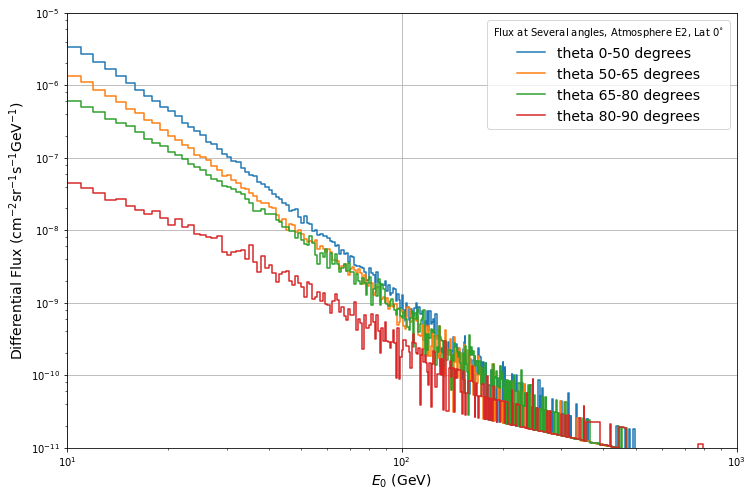

In [3]:
data_0_E2=np.loadtxt('muon_lat0_atmE2.out',delimiter=' ',usecols=range(3))
px_0_E2,py_0_E2,pz_0_E2=data_0_E2[:,0],data_0_E2[:,1],data_0_E2[:,2]
p_0_E2=np.sqrt(px_0_E2**2+py_0_E2**2+pz_0_E2**2)
m_rest=0.1057 #unit: GeV/c**2 #masa en reposo del muon
E_0_E2=np.round(np.sqrt(p_0_E2**2+m_rest**2)) # Energía a partir de la masa en reposo del muon
theta_0_E2=np.round(np.degrees(np.arccos(pz_0_E2/p_0_E2)),decimals=0) # Calcula en angulo cenith
at2_0_E2=np.arctan2(py_0_E2,px_0_E2)
phi_0_E2=np.round(np.degrees((2*np.pi+at2_0_E2)*(at2_0_E2<0)+(at2_0_E2)*(at2_0_E2>0)),decimals=0) # Calcula el angulo azimuth
data_0_E2=np.c_[theta_0_E2,phi_0_E2,E_0_E2]
data_0_E2=data_0_E2[data_0_E2[:,0].argsort()]
#print E_0_E2, theta_0_E2, phi_0_E2
#print data_0_E2
E1_0_E2=data_0_E2[(data_0_E2[:,0]>=.0) & (data_0_E2[:,0]<=50)][:,2]
E2_0_E2=data_0_E2[(data_0_E2[:,0]<=65) & (data_0_E2[:,0]>=50)][:,2]
E3_0_E2=data_0_E2[(data_0_E2[:,0]<=80) & (data_0_E2[:,0]>=65)][:,2]
E4_0_E2=data_0_E2[(data_0_E2[:,0]<=90) & (data_0_E2[:,0]>=80)][:,2]
F1_0_E2,F2_0_E2,F3_0_E2,F4_0_E2=np.unique(E1_0_E2),np.unique(E2_0_E2),np.unique(E3_0_E2),np.unique(E4_0_E2)
N1_0_E2,N2_0_E2,N3_0_E2,N4_0_E2=[],[],[],[]
for i in F1_0_E2:
    N1_0_E2.append(np.sum(E1_0_E2==i))
for i in F2_0_E2:
    N2_0_E2.append(np.sum(E2_0_E2==i))
for i in F3_0_E2:
    N3_0_E2.append(np.sum(E3_0_E2==i))
for i in F4_0_E2:
    N4_0_E2.append(np.sum(E4_0_E2==i))
N1_0_E2,N2_0_E2,N3_0_E2,N4_0_E2=np.array(N1_0_E2)/(factor*F1_0_E2),np.array(N2_0_E2)/(factor*F2_0_E2),np.array(N3_0_E2)/(factor*F3_0_E2),np.array(N4_0_E2)/(factor*F4_0_E2)

plt.figure(figsize=(12,8))
plt.loglog(F1_0_E2,N1_0_E2,label='theta 0-50 degrees',drawstyle='steps')
plt.loglog(F2_0_E2,N2_0_E2,label='theta 50-65 degrees',drawstyle='steps')
plt.loglog(F3_0_E2,N3_0_E2,label='theta 65-80 degrees',drawstyle='steps')
plt.loglog(F4_0_E2,N4_0_E2,label='theta 80-90 degrees',drawstyle='steps')

plt.legend(title=r'Flux at Several angles, Atmosphere E2, Lat 0$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.ylim(1E-11,1E-5)
plt.xlim(1E1,1E3)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in divide


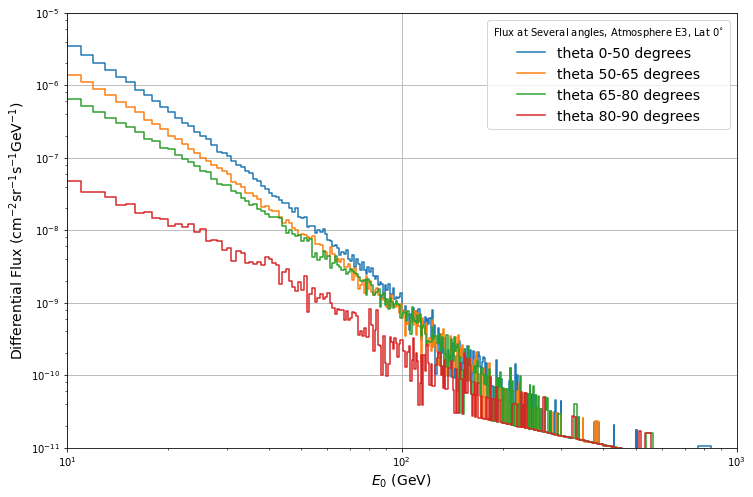

In [4]:
data_0_E3=np.loadtxt('muon_lat0_atmE3.out',delimiter=' ',usecols=range(3))
px_0_E3,py_0_E3,pz_0_E3=data_0_E3[:,0],data_0_E3[:,1],data_0_E3[:,2]
p_0_E3=np.sqrt(px_0_E3**2+py_0_E3**2+pz_0_E3**2)
m_rest=0.1057 #unit: GeV/c**2 #masa en reposo del muon
E_0_E3=np.round(np.sqrt(p_0_E3**2+m_rest**2)) # Energía a partir de la masa en reposo del muon
theta_0_E3=np.round(np.degrees(np.arccos(pz_0_E3/p_0_E3)),decimals=0) # Calcula en angulo cenith
at2_0_E3=np.arctan2(py_0_E3,px_0_E3)
phi_0_E3=np.round(np.degrees((2*np.pi+at2_0_E3)*(at2_0_E3<0)+(at2_0_E3)*(at2_0_E3>0)),decimals=0) # Calcula el angulo azimuth
data_0_E3=np.c_[theta_0_E3,phi_0_E3,E_0_E3]
data_0_E3=data_0_E3[data_0_E3[:,0].argsort()]
#print E_0_E3, theta_0_E3, phi_0_E3
#print data_0_E3
E1_0_E3=data_0_E3[(data_0_E3[:,0]>=.0) & (data_0_E3[:,0]<=50)][:,2]
E2_0_E3=data_0_E3[(data_0_E3[:,0]<=65) & (data_0_E3[:,0]>=50)][:,2]
E3_0_E3=data_0_E3[(data_0_E3[:,0]<=80) & (data_0_E3[:,0]>=65)][:,2]
E4_0_E3=data_0_E3[(data_0_E3[:,0]<=90) & (data_0_E3[:,0]>=80)][:,2]
F1_0_E3,F2_0_E3,F3_0_E3,F4_0_E3=np.unique(E1_0_E3),np.unique(E2_0_E3),np.unique(E3_0_E3),np.unique(E4_0_E3)
N1_0_E3,N2_0_E3,N3_0_E3,N4_0_E3=[],[],[],[]
for i in F1_0_E3:
    N1_0_E3.append(np.sum(E1_0_E3==i))
for i in F2_0_E3:
    N2_0_E3.append(np.sum(E2_0_E3==i))
for i in F3_0_E3:
    N3_0_E3.append(np.sum(E3_0_E3==i))
for i in F4_0_E3:
    N4_0_E3.append(np.sum(E4_0_E3==i))
N1_0_E3,N2_0_E3,N3_0_E3,N4_0_E3=np.array(N1_0_E3)/(factor*F1_0_E3),np.array(N2_0_E3)/(factor*F2_0_E3),np.array(N3_0_E3)/(factor*F3_0_E3),np.array(N4_0_E3)/(factor*F4_0_E3)

plt.figure(figsize=(12,8))
plt.loglog(F1_0_E3,N1_0_E3,label='theta 0-50 degrees',drawstyle='steps')
plt.loglog(F2_0_E3,N2_0_E3,label='theta 50-65 degrees',drawstyle='steps')
plt.loglog(F3_0_E3,N3_0_E3,label='theta 65-80 degrees',drawstyle='steps')
plt.loglog(F4_0_E3,N4_0_E3,label='theta 80-90 degrees',drawstyle='steps')

plt.legend(title=r'Flux at Several angles, Atmosphere E3, Lat 0$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.ylim(1E-11,1E-5)
plt.xlim(1E1,1E3)
plt.show()

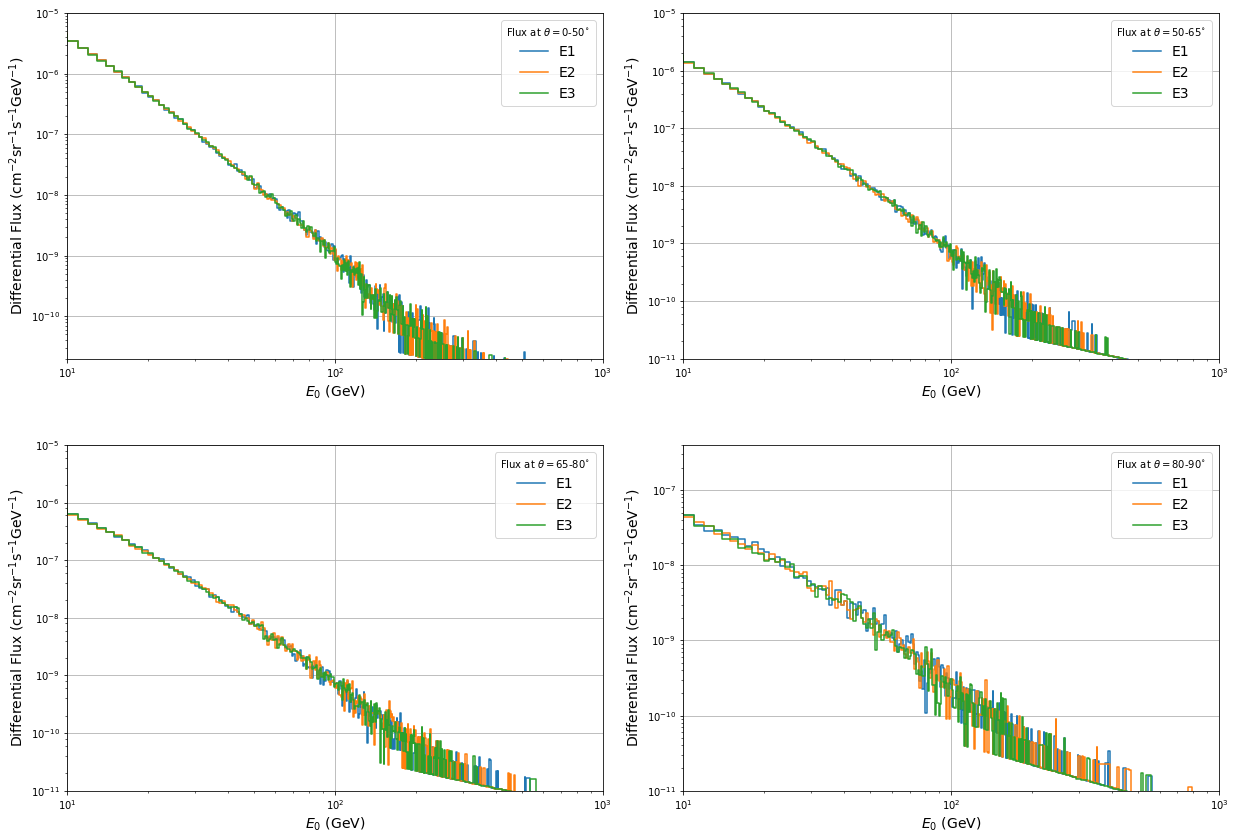

In [5]:
# Comparation of all fluxes...! with atmosphere E1, E2, E3 and latitude 0 degrees..!
plt.figure(figsize=(8,12))
plt.subplot(221)
plt.loglog(F1_0_E1,N1_0_E1,drawstyle='steps',label='E1')
plt.loglog(F1_0_E2,N1_0_E2,drawstyle='steps',label='E2')
plt.loglog(F1_0_E3,N1_0_E3,drawstyle='steps',label='E3')
plt.legend(title=r'Flux at $\theta=$0-50$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(2E-11,1E-5)

plt.subplot(222)
plt.loglog(F2_0_E1,N2_0_E1,drawstyle='steps',label='E1')
plt.loglog(F2_0_E2,N2_0_E2,drawstyle='steps',label='E2')
plt.loglog(F2_0_E3,N2_0_E3,drawstyle='steps',label='E3')
plt.legend(title=r'Flux at $\theta=$50-65$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(1E-11,1E-5)

plt.subplot(223)
plt.loglog(F3_0_E1,N3_0_E1,drawstyle='steps',label='E1')
plt.loglog(F3_0_E2,N3_0_E2,drawstyle='steps',label='E2')
plt.loglog(F3_0_E3,N3_0_E3,drawstyle='steps',label='E3')
plt.legend(title=r'Flux at $\theta=$65-80$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(1E-11,1E-5)

plt.subplot(224)
plt.loglog(F4_0_E1,N4_0_E1,drawstyle='steps',label='E1')
plt.loglog(F4_0_E2,N4_0_E2,drawstyle='steps',label='E2')
plt.loglog(F4_0_E3,N4_0_E3,drawstyle='steps',label='E3')
plt.legend(title=r'Flux at $\theta=$80-90$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(1E-11,4E-7)

plt.subplots_adjust(top=0.9,bottom=0,left=0,right=2,hspace=0.25,wspace=0.15)
plt.show()

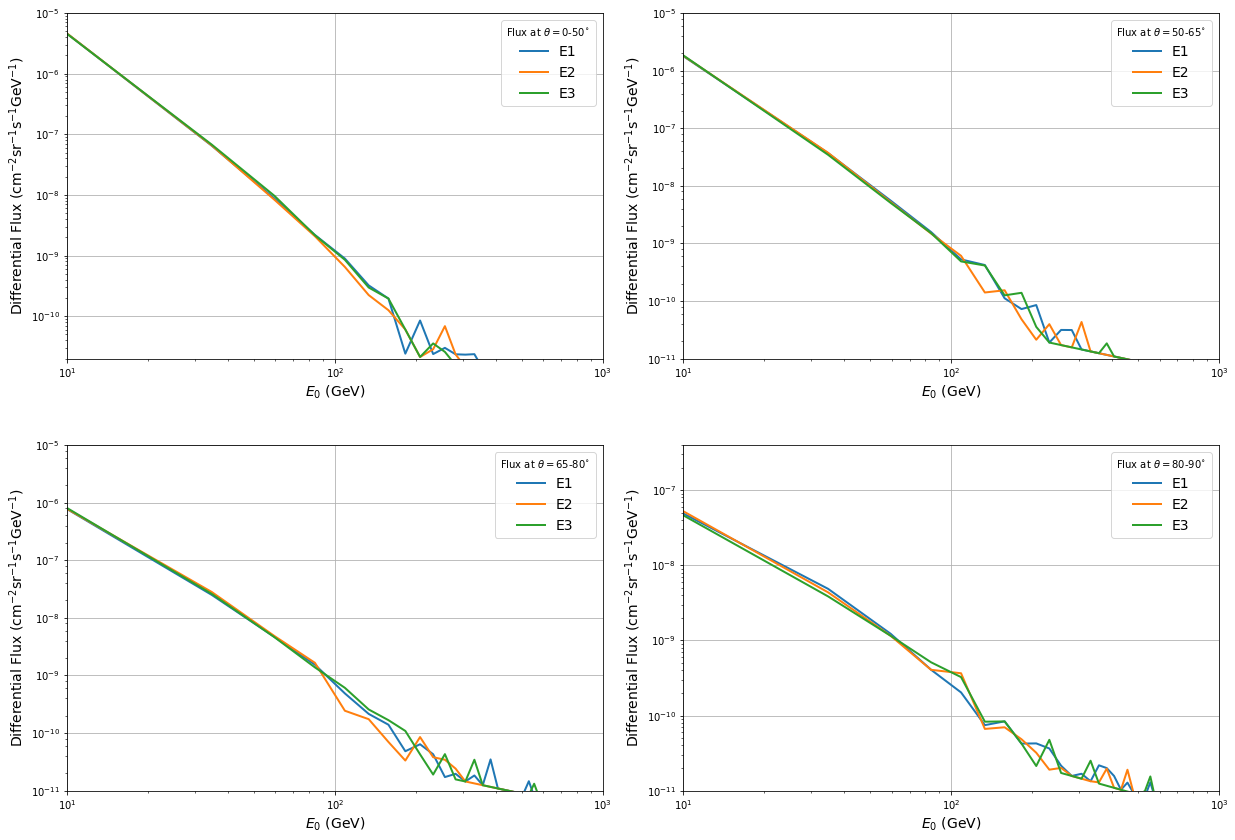

In [21]:
from scipy.interpolate import interp1d
f1_0_E1 = interp1d(F1_0_E1,N1_0_E1)
f2_0_E1 = interp1d(F2_0_E1,N2_0_E1)
f3_0_E1 = interp1d(F3_0_E1,N3_0_E1)
f4_0_E1 = interp1d(F4_0_E1,N4_0_E1)
f1_0_E2 = interp1d(F1_0_E2,N1_0_E2)
f2_0_E2 = interp1d(F2_0_E2,N2_0_E2)
f3_0_E2 = interp1d(F3_0_E2,N3_0_E2)
f4_0_E2 = interp1d(F4_0_E2,N4_0_E2)
f1_0_E3 = interp1d(F1_0_E3,N1_0_E3)
f2_0_E3 = interp1d(F2_0_E3,N2_0_E3)
f3_0_E3 = interp1d(F3_0_E3,N3_0_E3)
f4_0_E3 = interp1d(F4_0_E3,N4_0_E3)
xnew = np.linspace(1E1, 1E3, num=41, endpoint=True)
plt.figure(figsize=(8,12))
plt.subplot(221)
plt.plot(xnew,f1_0_E1(xnew),label='E1',lw=2)
plt.plot(xnew,f1_0_E2(xnew),label='E2',lw=2)
plt.plot(xnew,f1_0_E3(xnew),label='E3',lw=2)
plt.legend(title=r'Flux at $\theta=$0-50$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(2E-11,1E-5)

plt.subplot(222)
plt.loglog(xnew,f2_0_E1(xnew),label='E1',lw=2)
plt.loglog(xnew,f2_0_E2(xnew),label='E2',lw=2)
plt.loglog(xnew,f2_0_E3(xnew),label='E3',lw=2)
plt.legend(title=r'Flux at $\theta=$50-65$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(1E-11,1E-5)

plt.subplot(223)
plt.loglog(xnew,f3_0_E1(xnew),label='E1',lw=2)
plt.loglog(xnew,f3_0_E2(xnew),label='E2',lw=2)
plt.loglog(xnew,f3_0_E3(xnew),label='E3',lw=2)
plt.legend(title=r'Flux at $\theta=$65-80$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(1E-11,1E-5)

plt.subplot(224)
plt.loglog(xnew,f4_0_E1(xnew),label='E1',lw=2)
plt.loglog(xnew,f4_0_E2(xnew),label='E2',lw=2)
plt.loglog(xnew,f4_0_E3(xnew),label='E3',lw=2)
plt.legend(title=r'Flux at $\theta=$80-90$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(1E-11,4E-7)

plt.subplots_adjust(top=0.9,bottom=0,left=0,right=2,hspace=0.25,wspace=0.15)
plt.show()

In [ ]:





x,y=F10E1,N10E1/F10E1/3600/1E4/30/360*3283
f = interp1d(x, y)
f2 = interp1d(x, y, kind='nearest')
xnew = np.linspace(1E1, 1E3, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(xnew, f(xnew))#, '-', xnew, f2(xnew))#, '--', x, y, 'o')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [5]:
data0E2=np.loadtxt('muon_lat0_atmE2.out',delimiter=' ',usecols=range(3))
px0E2,py0E2,pz0E2=data0E2[:,0],data0E2[:,1],data0E2[:,2]
p0E2=np.sqrt(px0E2**2+py0E2**2+pz0E2**2)
m_rest=0.1057 #unit: GeV/c**2 #masa en reposo del muon
E0E2=np.round(np.sqrt(p0E2**2+m_rest**2)) # Energía a partir de la masa en reposo del muon
theta0E2=np.round(np.degrees(np.arccos(pz0E2/p0E2)),decimals=0) # Calcula en angulo cenith
at20E2=np.arctan2(py0E2,px0E2)
phi0E2=np.round(np.degrees((2*np.pi+at20E2)*(at20E2<0)+(at20E2)*(at20E2>0)),decimals=0) # Calcula el angulo azimuth
data0E2=np.c_[theta0E2,phi0E2,E0E2]
data0E2=data0E2[data0E2[:,0].argsort()]
#print E0E2, theta0E2, phi0E2
print data0E2

[[   0.   82.    1.]
 [   0.    2.    5.]
 [   0.  137.   10.]
 ..., 
 [  89.  302.   12.]
 [  89.  298.   14.]
 [  90.   39.   86.]]


In [6]:
data0E2=np.c_[theta0E2,phi0E2,E0E2]
data0E2=data0E2[data0E2[:,0].argsort()]
#print data
E10E2=data0E2[(data0E2[:,0]>=.0) & (data0E2[:,0]<=40)][:,2]
E20E2=data0E2[(data0E2[:,0]<=50) & (data0E2[:,0]>=40)][:,2]
E30E2=data0E2[(data0E2[:,0]<=70) & (data0E2[:,0]>=60)][:,2]
E40E2=data0E2[(data0E2[:,0]<=90) & (data0E2[:,0]>=80)][:,2]
F10E2,F20E2,F30E2,F40E2=np.unique(E10E2),np.unique(E20E2),np.unique(E30E2),np.unique(E40E2)
N10E2,N20E2,N30E2,N40E2,N50E2=[],[],[],[],[]
for i in F10E2:
    N10E2.append(np.sum(E10E2==i))
for i in F20E2:
    N20E2.append(np.sum(E20E2==i))
for i in F30E2:
    N30E2.append(np.sum(E30E2==i))
for i in F40E2:
    N40E2.append(np.sum(E40E2==i))
N10E2,N20E2,N30E2,N40E2=np.array(N10E2),np.array(N20E2),np.array(N30E2),np.array(N40E2)
print len(E10E2), len(F10E2), len(N10E2)

400251 304 304


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


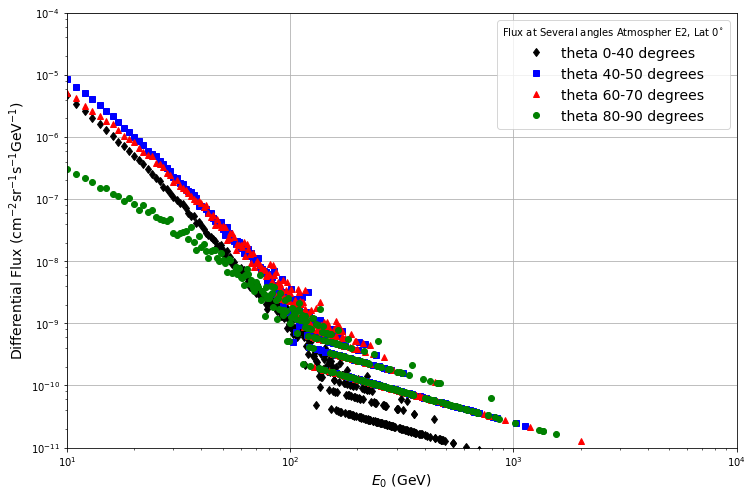

In [8]:
plt.figure(figsize=(12,8))
plt.loglog(F10E2,N10E2/F10E2/3600/1E4/40/360*3283,color='black',marker='d',linestyle='None',label='theta 0-40 degrees',lw=1.5)
plt.loglog(F20E2,N20E2/F20E2/3600/1E4/10/360*3283,color='blue',marker='s',linestyle='None',label='theta 40-50 degrees',lw=1.5)
plt.loglog(F30E2,N30E2/F30E2/3600/1E4/10/360*3283,color='red',marker='^',linestyle='None',label='theta 60-70 degrees',lw=1.5)
plt.loglog(F40E2,N40E2/F40E2/3600/1E4/10/360*3283,color='green',marker='o',linestyle='None',label='theta 80-90 degrees',lw=1.5)

plt.legend(title=r'Flux at Several angles Atmospher E2, Lat 0$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.ylim(1E-11,1E-4)
plt.xlim(1E1,1E4)
plt.show()
#angulo sólido 2.39x10^{-4} de m a cm por 10^4, un deg^2=1/3283

In [8]:
data0E3=np.loadtxt('muon_lat0_atmE3.out',delimiter=' ',usecols=range(3))
px0E3,py0E3,pz0E3=data0E3[:,0],data0E3[:,1],data0E3[:,2]
p0E3=np.sqrt(px0E3**2+py0E3**2+pz0E3**2)
m_rest=0.1057 #unit: GeV/c**2 #masa en reposo del muon
E0E3=np.round(np.sqrt(p0E3**2+m_rest**2)) # Energía a partir de la masa en reposo del muon
theta0E3=np.round(np.degrees(np.arccos(pz0E3/p0E3)),decimals=0) # Calcula en angulo cenith
at20E3=np.arctan2(py0E3,px0E3)
phi0E3=np.round(np.degrees((2*np.pi+at20E3)*(at20E3<0)+(at20E3)*(at20E3>0)),decimals=0) # Calcula el angulo azimuth
data0E3=np.c_[theta0E3,phi0E3,E0E3]
data0E3=data0E3[data0E3[:,0].argsort()]
#print E0E1, theta0E1, phi0E1
print data0E3

[[   0.  233.    0.]
 [   0.  151.    1.]
 [   0.  210.    5.]
 ..., 
 [  90.  132.   36.]
 [  90.  162.  164.]
 [  90.  202.   95.]]


In [9]:
data0E3=np.c_[theta0E3,phi0E3,E0E3]
data0E3=data0E3[data0E3[:,0].argsort()]
#print data
E10E3=data0E3[(data0E3[:,0]>=.0) & (data0E3[:,0]<=30)][:,2]
E20E3=data0E3[(data0E3[:,0]<=50) & (data0E3[:,0]>=40)][:,2]
E30E3=data0E3[(data0E3[:,0]<=70) & (data0E3[:,0]>=60)][:,2]
E40E3=data0E3[(data0E3[:,0]<=90) & (data0E3[:,0]>=80)][:,2]
F10E3,F20E3,F30E3,F40E3=np.unique(E10E3),np.unique(E20E3),np.unique(E30E3),np.unique(E40E3)
N10E3,N20E3,N30E3,N40E3,N50E3=[],[],[],[],[]
for i in F10E3:
    N10E3.append(np.sum(E10E3==i))
for i in F20E3:
    N20E3.append(np.sum(E20E3==i))
for i in F30E3:
    N30E3.append(np.sum(E30E3==i))
for i in F40E3:
    N40E3.append(np.sum(E40E3==i))
N10E3,N20E3,N30E3,N40E3=np.array(N10E3),np.array(N20E3),np.array(N30E3),np.array(N40E3)
print len(E10E3), len(F10E3), len(N10E3)

268101 249 249


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


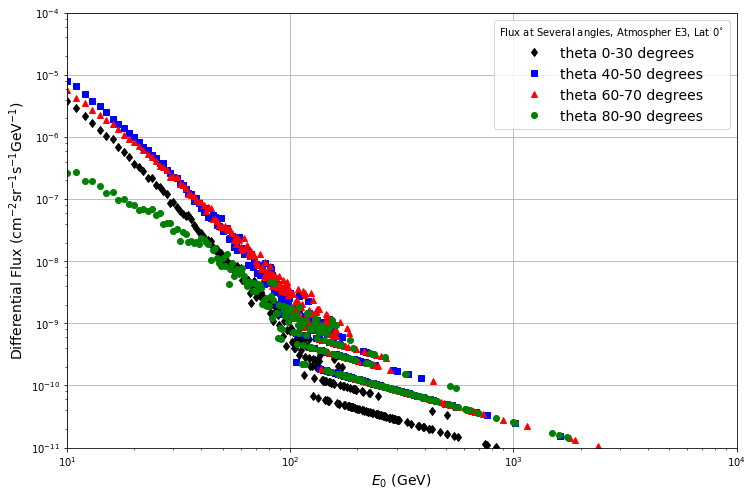

In [10]:
plt.figure(figsize=(12,8))
plt.plot(F10E3,N10E3/F10E3/3600/1E4/30/360*3283,color='black',marker='d',linestyle='None',label='theta 0-30 degrees',lw=1.5)
plt.plot(F20E3,N20E3/F20E3/3600/1E4/10/360*3283,color='blue',marker='s',linestyle='None',label='theta 40-50 degrees',lw=1.5)
plt.plot(F30E3,N30E3/F30E3/3600/1E4/10/360*3283,color='red',marker='^',linestyle='None',label='theta 60-70 degrees',lw=1.5)
plt.plot(F40E3,N40E3/F40E3/3600/1E4/10/360*3283,color='green',marker='o',linestyle='None',label='theta 80-90 degrees',lw=1.5)

plt.legend(title=r'Flux at Several angles, Atmospher E3, Lat 0$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.ylim(1E-11,1E-4)
plt.xlim(1E1,1E4)
plt.show()
#angulo sólido 2.39x10^{-4} de m a cm por 10^4, un deg^2=1/3283

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


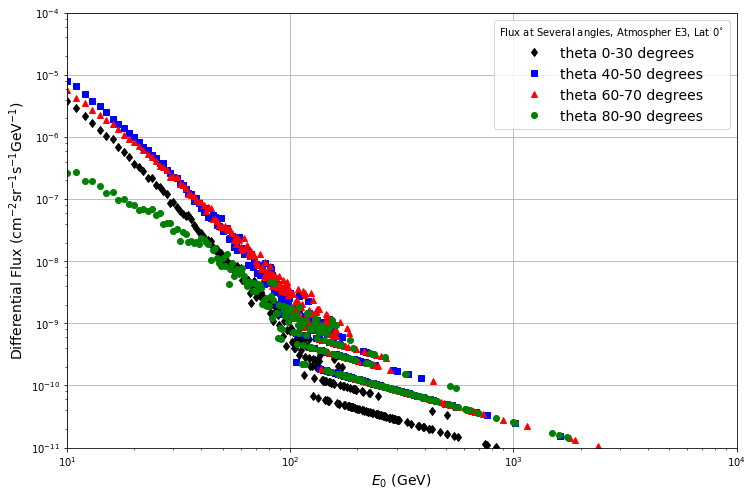

In [11]:
plt.figure(figsize=(12,8))
plt.loglog(F10E3,N10E3/F10E3/3600/1E4/30/360*3283,color='black',marker='d',linestyle='None',label='theta 0-30 degrees',lw=1.5)
plt.loglog(F20E3,N20E3/F20E3/3600/1E4/10/360*3283,color='blue',marker='s',linestyle='None',label='theta 40-50 degrees',lw=1.5)
plt.loglog(F30E3,N30E3/F30E3/3600/1E4/10/360*3283,color='red',marker='^',linestyle='None',label='theta 60-70 degrees',lw=1.5)
plt.loglog(F40E3,N40E3/F40E3/3600/1E4/10/360*3283,color='green',marker='o',linestyle='None',label='theta 80-90 degrees',lw=1.5)

plt.legend(title=r'Flux at Several angles, Atmospher E3, Lat 0$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.ylim(1E-11,1E-4)
plt.xlim(1E1,1E4)
plt.show()
#angulo sólido 2.39x10^{-4} de m a cm por 10^4, un deg^2=1/3283

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.p

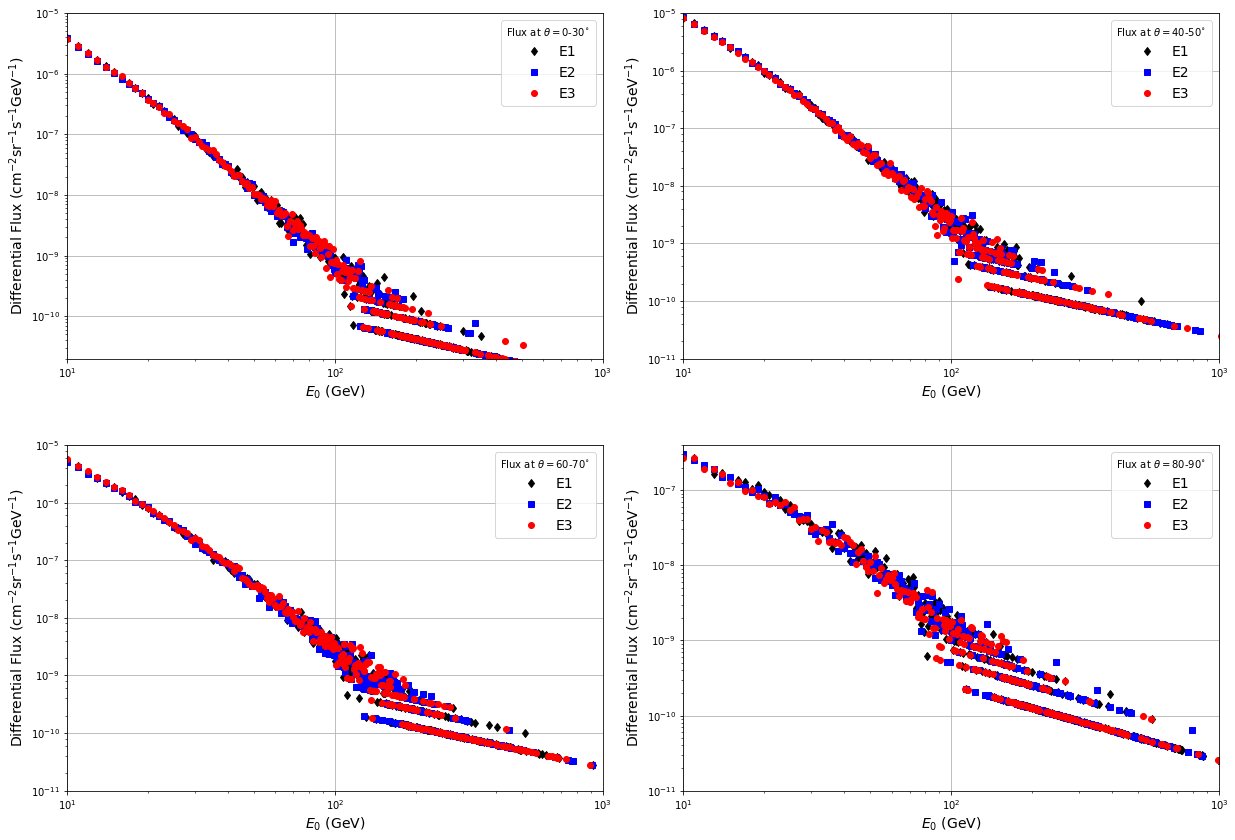

In [12]:
# Comparation of all fluxes...!
plt.figure(figsize=(8,12))
plt.subplot(221)
plt.loglog(F10E1,N10E1/F10E1/3600/1E4/30/360*3283,color='black',marker='d',linestyle='None',label='E1',lw=1.5)
plt.loglog(F10E2,N10E2/F10E2/3600/1E4/30/360*3283,color='blue',marker='s',linestyle='None',label='E2',lw=1.5)
plt.loglog(F10E3,N10E3/F10E3/3600/1E4/30/360*3283,color='red',marker='o',linestyle='None',label='E3',lw=1.5)
plt.legend(title=r'Flux at $\theta=$0-30$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(2E-11,1E-5)

plt.subplot(222)
plt.loglog(F20E1,N20E1/F20E1/3600/1E4/10/360*3283,color='black',marker='d',linestyle='None',label='E1',lw=1.5)
plt.loglog(F20E2,N20E2/F20E2/3600/1E4/10/360*3283,color='blue',marker='s',linestyle='None',label='E2',lw=1.5)
plt.loglog(F20E3,N20E3/F20E3/3600/1E4/10/360*3283,color='red',marker='o',linestyle='None',label='E3',lw=1.5)
plt.legend(title=r'Flux at $\theta=$40-50$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(1E-11,1E-5)

plt.subplot(223)
plt.loglog(F30E1,N30E1/F30E1/3600/1E4/10/360*3283,color='black',marker='d',linestyle='None',label='E1',lw=1.5)
plt.loglog(F30E2,N30E2/F30E2/3600/1E4/10/360*3283,color='blue',marker='s',linestyle='None',label='E2',lw=1.5)
plt.loglog(F30E3,N30E3/F30E3/3600/1E4/10/360*3283,color='red',marker='o',linestyle='None',label='E3',lw=1.5)
plt.legend(title=r'Flux at $\theta=$60-70$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(1E-11,1E-5)

plt.subplot(224)
plt.loglog(F40E1,N40E1/F40E1/3600/1E4/10/360*3283,color='black',marker='d',linestyle='None',label='E1',lw=1.5)
plt.loglog(F40E2,N40E2/F40E2/3600/1E4/10/360*3283,color='blue',marker='s',linestyle='None',label='E2',lw=1.5)
plt.loglog(F40E3,N40E3/F40E3/3600/1E4/10/360*3283,color='red',marker='o',linestyle='None',label='E3',lw=1.5)
plt.legend(title=r'Flux at $\theta=$80-90$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E3)
plt.ylim(1E-11,4E-7)

plt.subplots_adjust(top=0.9,bottom=0,left=0,right=2,hspace=0.25,wspace=0.15)
plt.show()

Vamos a mejorar la gráfica haciendo interpolación para no tener tantos puntos en la parte final de la gráfica...

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


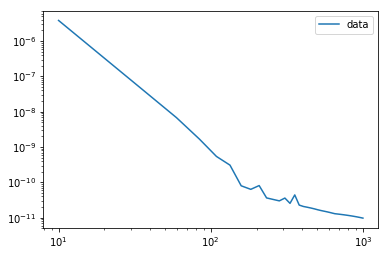

In [25]:
from scipy.interpolate import interp1d
x,y=F10E1,N10E1/F10E1/3600/1E4/30/360*3283
f = interp1d(x, y)
f2 = interp1d(x, y, kind='nearest')
xnew = np.linspace(1E1, 1E3, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(xnew, f(xnew))#, '-', xnew, f2(xnew))#, '--', x, y, 'o')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
def f2(x,y):
    f2 = interp1d(x, y, kind='nearest')
    xnew = np.linspace(1E1, 1E3, num=41, endpoint=True)
    return f2

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


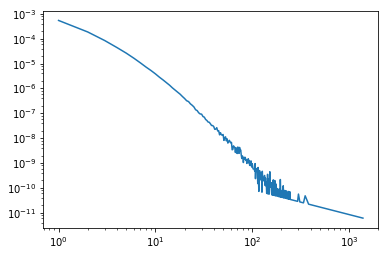

In [15]:
x = F10E1
y = N10E1/F10E1/3600/1E4/30/360*3283
plt.loglog(x,y)
plt.show()

/usr/local/lib/python2.7/dist-packages/numpy/core/function_base.py:207: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6432: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/usr/local/lib/python2.7/dist-packages/matplotlib/ticker.py:2041: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


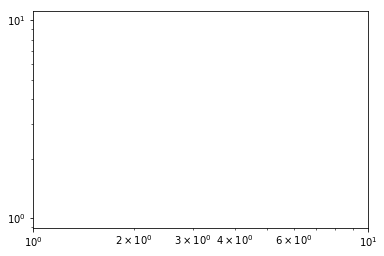

In [16]:
from scipy.interpolate import spline
from scipy.interpolate import interp1d
xnew = np.logspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
y_smooth = spline(x,y,xnew)
plt.loglog(xnew,y_smooth)
plt.show()

In [17]:
print y

[             inf   5.39989326e-04   1.85876232e-04   8.37384542e-05
   4.40730928e-05   2.61491626e-05   1.62981923e-05   1.06140201e-05
   7.20478331e-06   5.23805127e-06   3.84114378e-06   2.82180789e-06
   2.18416324e-06   1.69787947e-06   1.34620370e-06   1.04704733e-06
   8.45448495e-07   7.00349492e-07   5.84976709e-07   4.72860082e-07
   3.93064943e-07   3.20065158e-07   2.94386106e-07   2.38632806e-07
   2.08987269e-07   1.79011317e-07   1.38675313e-07   1.27909903e-07
   1.04342850e-07   9.37567405e-08   9.20388374e-08   7.38162917e-08
   6.96624228e-08   5.62928669e-08   5.14086329e-08   4.43909465e-08
   4.33924183e-08   3.76553637e-08   3.22202594e-08   3.20436320e-08
   2.93426569e-08   2.26544465e-08   2.29192387e-08   2.63136425e-08
   1.93826576e-08   1.98901463e-08   1.35837135e-08   1.65285439e-08
   1.35454711e-08   1.32690329e-08   1.40169239e-08   8.11279553e-09
   1.05549126e-08   1.13116799e-08   7.81845374e-09   9.36508605e-09
   6.33294753e-09   6.96253881e-09

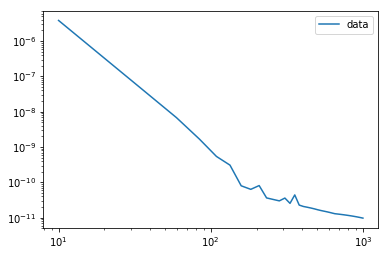

In [22]:
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(1E1, 1E3, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(xnew, f(xnew), '-')#, xnew, f2(xnew), '--', x, y, 'o')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.yscale('log')
plt.xscale('log')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in subtract


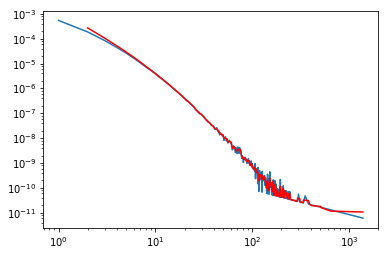

In [97]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

yhat = savitzky_golay(y, 3, 1) # window size 51, polynomial order 3

plt.loglog(x,y)
plt.loglog(x,yhat, color='red')
plt.show()

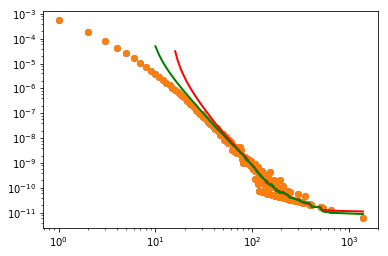

In [69]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.8

def smooth(power, box_pts):
    box = np.ones(box_pts)/box_pts
    power_smooth = np.convolve(power, box, mode='same')
    return power_smooth

plt.loglog(T, power,'o')
plt.loglog(T, smooth(power,30), 'r-', lw=2)
plt.loglog(T, smooth(power,19), 'g-', lw=2)
plt.show()

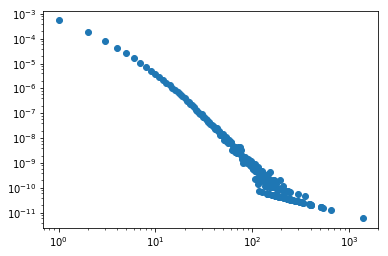

In [75]:
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
# The third parameter specifies the type of the variable x;
# 'c' stands for continuous
kr = KernelReg(power,T,'c')
plt.loglog(T, power, 'o')
power_pred, power_std = kr.fit(T)
plt.loglog(T, power_pred)
plt.show()

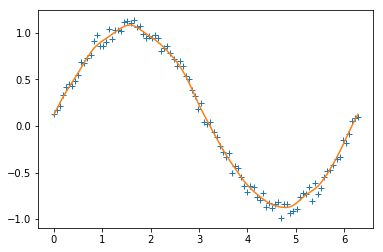

In [74]:
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
# The third parameter specifies the type of the variable x;
# 'c' stands for continuous
kr = KernelReg(y,x,'c')
plt.plot(x, y, '+')
y_pred, y_std = kr.fit(x)
plt.plot(x, y_pred)
plt.show()

In [13]:
df1=pd.read_csv('muones_buca_1h.out',sep=' ',names=['px','py','pz','p'])
df1.head(5)
px,py,pz=df1['px'],df1['py'],df1['pz']
pt=np.sqrt(px**2+py**2+pz**2)
m_rest=0.1057 #unit: GeV/c**2
Et=np.sqrt(pt**2+m_rest**2)
thetat=np.degrees(np.arccos(pz/pt))
at2=np.arctan2(py,px)
phit=np.degrees((2*np.pi+at2)*(at2<0)+(at2)*(at2>0))
data_var=np.c_[thetat,phit,Et]
data=np.savetxt('tpE_muones_buca.out',data_var,delimiter=' ',fmt='%i %i %2f')
df2=pd.read_csv('tpE_muones_buca.out',sep=' ',names=['theta','phi','E'])
df2.groupby(['theta','E']).count()

IOError: File muones_buca_1h.out does not exist